In [ ]:
# Download latest version
import kagglehub
path = kagglehub.dataset_download("ishans24/brain-tumor-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'brain-tumor-dataset' dataset.
Path to dataset files: /kaggle/input/brain-tumor-dataset


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Sequential


In [ ]:
IMG_HEIGTH = 384
IMG_WIDTH = 384
BATCH_SIZE = 16

In [ ]:
datadir = '/kaggle/input/brain-tumor-dataset'
train_ds = tf.keras.utils.image_dataset_from_directory(
  datadir,
  validation_split=0.2,
  subset="training",
  label_mode='categorical',
  seed=123,
  image_size=(IMG_HEIGTH, IMG_WIDTH),
  batch_size=BATCH_SIZE)

val_ds = tf.keras.utils.image_dataset_from_directory(
  datadir,
  validation_split=0.2,
  subset="validation",
  label_mode='categorical',
  seed=123,
  image_size=(IMG_HEIGTH, IMG_WIDTH),
  batch_size=BATCH_SIZE)

Found 10560 files belonging to 4 classes.
Using 8448 files for training.
Found 10560 files belonging to 4 classes.
Using 2112 files for validation.


In [ ]:
model = Sequential([
  layers.Dense(4, activation='relu', input_shape=[IMG_HEIGTH, IMG_WIDTH, 3]),
  layers.Conv2D(128, kernel_size=[3,3], padding='valid', activation='relu'),
  layers.MaxPooling2D(pool_size=[3,3], strides=2, padding='valid'),
  layers.Conv2D(64, kernel_size=[3,3], padding='valid', activation='relu'),
  layers.MaxPooling2D(pool_size=[3,3], strides=2, padding='valid'),
  layers.Conv2D(32, kernel_size=[3,3], padding='valid', activation='relu'),
  layers.MaxPooling2D(pool_size=[2,2], strides=2, padding='valid'),
  layers.Conv2D(16, kernel_size=[2,2], padding='valid', activation='relu'),
  layers.MaxPooling2D(pool_size=[2,2], strides=2, padding='valid'),
  layers.Conv2D(8, kernel_size=[2,2], padding='valid', activation='relu'),
  layers.MaxPooling2D(pool_size=[2,2], strides=2, padding='valid'),
  layers.Flatten(),
  layers.Dense(4, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 384, 384, 4)    │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 382, 382, 128)  │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 190, 190, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 188, 188, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 93, 93, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 91, 91, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 44, 44, 16)     │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 22, 22, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 21, 21, 8)      │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 10, 10, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │         3,204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,796 (401.55 KB)

 Trainable params: 102,796 (401.55 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=15, verbose=2)

Epoch 1/15
528/528 - 108s - 205ms/step - categorical_accuracy: 0.6039 - loss: 0.9995 - val_categorical_accuracy: 0.7614 - val_loss: 0.6235
Epoch 2/15
528/528 - 103s - 195ms/step - categorical_accuracy: 0.7811 - loss: 0.5673 - val_categorical_accuracy: 0.7633 - val_loss: 0.5932
Epoch 3/15
528/528 - 104s - 197ms/step - categorical_accuracy: 0.8133 - loss: 0.4798 - val_categorical_accuracy: 0.8163 - val_loss: 0.4616
Epoch 4/15
528/528 - 102s - 194ms/step - categorical_accuracy: 0.8336 - loss: 0.4240 - val_categorical_accuracy: 0.8357 - val_loss: 0.4271
Epoch 5/15
528/528 - 101s - 192ms/step - categorical_accuracy: 0.8491 - loss: 0.3857 - val_categorical_accuracy: 0.7917 - val_loss: 0.5731
Epoch 6/15
528/528 - 102s - 193ms/step - categorical_accuracy: 0.8623 - loss: 0.3573 - val_categorical_accuracy: 0.8324 - val_loss: 0.4821
Epoch 7/15
528/528 - 102s - 193ms/step - categorical_accuracy: 0.8731 - loss: 0.3224 - val_categorical_accuracy: 0.8594 - val_loss: 0.3943
Epoch 8/15
528/528 - 104s -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[1.5422507e-03 5.1302424e-05 9.9840647e-01 7.9954869e-13]]


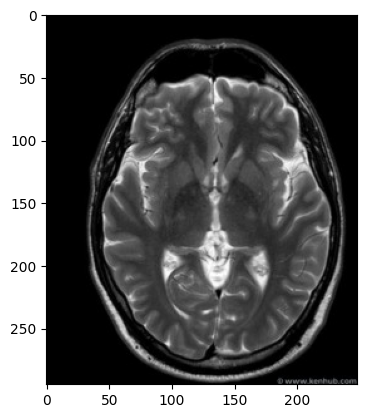

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

y_hat = plt.imread('/healt.jpg')
plt.imshow(y_hat)
def prepare(image):
  IMG_SIZE=384
  img_array = cv2.imread('/healt.jpg', cv2.IMREAD_COLOR)
  new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

y_hat = model.predict([prepare('/healt.jpg')])
print(y_hat)

In [ ]:
np.argmax(y_hat)

np.int64(2)

In [ ]:
model.save('brain_tumor_classifier.keras')